# Metabolic Modeling of “Escherichia coli”

In [ ]:
pip install cobra


In [ ]:
from google.colab import files

# Upload the iJO1366.xml file
uploaded = files.upload()


Saving iJO1366.xml to iJO1366.xml


In [ ]:
# Import necessary libraries
import cobra
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt

# Load the iJO1366 model from uploaded file
model = read_sbml_model("iJO1366.xml")

# Display a summary of the model
print(model.summary())


Objective
1.0 BIOMASS_Ec_iJO1366_core_53p95M = 0.9823718127269743

Uptake
------
Metabolite     Reaction      Flux  C-Number  C-Flux
     ca2_e     EX_ca2_e  0.005113         0   0.00%
      cl_e      EX_cl_e  0.005113         0   0.00%
 cobalt2_e EX_cobalt2_e 2.456E-05         0   0.00%
     cu2_e     EX_cu2_e 0.0006965         0   0.00%
     fe2_e     EX_fe2_e   0.01578         0   0.00%
  glc__D_e  EX_glc__D_e        10         6 100.00%
       k_e       EX_k_e    0.1918         0   0.00%
     mg2_e     EX_mg2_e  0.008522         0   0.00%
     mn2_e     EX_mn2_e 0.0006788         0   0.00%
    mobd_e    EX_mobd_e 0.0001267         0   0.00%
     nh4_e     EX_nh4_e     10.61         0   0.00%
     ni2_e     EX_ni2_e 0.0003173         0   0.00%
      o2_e      EX_o2_e     17.58         0   0.00%
      pi_e      EX_pi_e    0.9476         0   0.00%
     so4_e     EX_so4_e    0.2478         0   0.00%
     zn2_e     EX_zn2_e  0.000335         0   0.00%

Secretion
---------
Metabolite    

In [ ]:
# Check the basic properties of the model
print("Number of reactions:", len(model.reactions))
print("Number of metabolites:", len(model.metabolites))
print("Number of genes:", len(model.genes))


Number of reactions: 2583
Number of metabolites: 1805
Number of genes: 1367


In [ ]:
# List all reactions in the model to identify the biomass reaction
for reaction in model.reactions:
    print(reaction.id, ":", reaction.name)


EX_cm_e : Chloramphenicol exchange
EX_cmp_e : CMP exchange
EX_co2_e : CO2 exchange
EX_cobalt2_e : Co2+ exchange
DM_4crsol_c : Sink needed to allow p-Cresol to leave system
DM_5drib_c : Sink needed to allow 5'-deoxyribose to leave system
DM_aacald_c : Sink needed to allow aminoacetaldehyde to leave system
DM_amob_c : Sink needed to allow S-Adenosyl-4-methylthio-2-oxobutanoate to leave system
DM_mththf_c : Sink needed to allow (2R,4S)-2-methyl-2,3,3,4-tetrahydroxytetrahydrofuran to leave system
EX_colipa_e : Core oligosaccharide lipid A exchange
DM_oxam_c : Sink needed to allow oxamate to leave system
EX_glc__D_e : D-Glucose exchange
EX_glcn_e : D-Gluconate exchange
BIOMASS_Ec_iJO1366_WT_53p95M : E. coli biomass objective function (iJO1366) - WT - with 53.95 GAM estimate
EX_glcr_e : D-Glucarate exchange
EX_colipap_e : Core oligosaccharide lipid A diphosphate exchange
EX_glcur_e : D-Glucuronate exchange
EX_glcur1p_e : D-Glucuronate 1-phosphate exchange
BIOMASS_Ec_iJO1366_core_53p95M : E. 

In [ ]:
# Set the objective function to the correct biomass reaction
model.objective = "BIOMASS_Ec_iJO1366_core_53p95M"


In [ ]:
# Set the objective function to maximize biomass production
model.objective = "BIOMASS_Ec_iJO1366_core_53p95M"

# Set environmental conditions
# Glucose uptake rate
model.reactions.get_by_id("EX_glc__D_e").bounds = (-10, 1000)  # mmol/gDW/h

# Oxygen uptake rate (for aerobic conditions)
model.reactions.get_by_id("EX_o2_e").bounds = (-20, 1000)  # Aerobic

# Display a confirmation
print("Objective and environmental conditions set.")


Objective and environmental conditions set.


In [ ]:
# Retrieve and display the biomass reaction details
biomass_reaction = model.reactions.get_by_id("BIOMASS_Ec_iJO1366_core_53p95M")  # Adjust if your model's biomass reaction has a different ID
print(biomass_reaction)
print(biomass_reaction.reaction)  # Shows the full reaction equation


BIOMASS_Ec_iJO1366_core_53p95M: 0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 2ohph_c + 0.00026 4fe4s_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c + 0.000122 bmocogdp_c + 2e-06 btn_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 2.5e-05 cobalt2_c + 0.133508 ctp_c + 0.000709 cu2_c + 0.09158 cys__L_c + 0.026166 datp_c + 0.027017 dctp_c + 0.027017 dgtp_c + 0.026166 dttp_c + 0.000223 fad_c + 0.006715 fe2_c + 0.007808 fe3_c + 0.26316 gln__L_c + 0.26316 glu__L_c + 0.612638 gly_c + 0.215096 gtp_c + 48.601527 h2o_c + 0.094738 his__L_c + 0.290529 ile__L_c + 0.195193 k_c + 0.019456 kdo2lipid4_e + 0.450531 leu__L_c + 0.343161 lys__L_c + 0.153686 met__L_c + 0.008675 mg2_c + 0.000223 mlthf_c + 0.000691 mn2_c + 7e-06 mobd_c + 0.013894 murein5px4p_p + 0.001831 nad_c + 0.000447 nadp_c + 0.013013 nh4_c + 0.000323 ni2_c + 0.017868 pe160_c + 0.045946 pe160_p + 0.054154 pe161_c + 0.02106 pe161_p + 0.185265 phe__L_c + 0.000223 

In [ ]:
# Run Flux Balance Analysis
solution = model.optimize()

# Display the biomass growth rate (objective value)
print("Biomass growth rate (objective value):", solution.objective_value)


Biomass growth rate (objective value): 0.9823718127269854


In [ ]:
# Display flux values for selected key reactions
for reaction_id in ["PFK", "PYK", "PDH", "G6PDH2r", "CS", "ATPM"]:
    reaction = model.reactions.get_by_id(reaction_id)
    print(f"{reaction.id}: {solution.fluxes[reaction.id]} mmol/gDW/h")


PFK: 7.784185977729073 mmol/gDW/h
PYK: 0.8653751925205326 mmol/gDW/h
PDH: 7.969186891483158 mmol/gDW/h
G6PDH2r: 4.081934853516559 mmol/gDW/h
CS: 4.8577766442263055 mmol/gDW/h
ATPM: 3.15 mmol/gDW/h


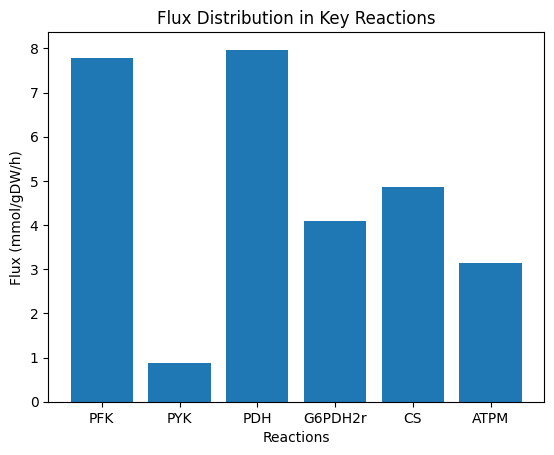

In [ ]:
import matplotlib.pyplot as plt

# Define the list of reaction IDs you're interested in
selected_reaction_ids = ["PFK", "PYK", "PDH", "G6PDH2r", "CS", "ATPM"]

# Extract the flux values for the selected reactions
flux_values = [solution.fluxes[reaction_id] for reaction_id in selected_reaction_ids]

# Plot the flux distribution for selected reactions
plt.bar(selected_reaction_ids, flux_values)
plt.xlabel("Reactions")
plt.ylabel("Flux (mmol/gDW/h)")
plt.title("Flux Distribution in Key Reactions")
plt.show()


# Modeling the Lactic Acid Pathway in Lactobacillus plantarum

In [ ]:
pip install cobra


In [ ]:
from cobra import Model, Reaction, Metabolite

# Initialize the model
model = Model("Lactobacillus_plantarum_Lactic_Acid_Model")



In [ ]:

# Define metabolites
glucose_e = Metabolite("glucose_e", compartment="e")  # extracellular glucose
glucose = Metabolite("glucose", compartment="c")  # intracellular glucose
glc6p = Metabolite("glc6p", compartment="c")  # glucose-6-phosphate
f6p = Metabolite("f6p", compartment="c")  # fructose-6-phosphate
f16bp = Metabolite("f16bp", compartment="c")  # fructose-1,6-bisphosphate
dhap = Metabolite("dhap", compartment="c")  # dihydroxyacetone phosphate
g3p = Metabolite("g3p", compartment="c")  # glyceraldehyde-3-phosphate
bpg = Metabolite("bpg", compartment="c")  # 1,3-bisphosphoglycerate
pg3 = Metabolite("pg3", compartment="c")  # 3-phosphoglycerate
pg2 = Metabolite("pg2", compartment="c")  # 2-phosphoglycerate
pep = Metabolite("pep", compartment="c")  # phosphoenolpyruvate
pyruvate = Metabolite("pyruvate", compartment="c")
lactate = Metabolite("lactate", compartment="c")
lactate_e = Metabolite("lactate_e", compartment="e")
atp = Metabolite("atp", compartment="c")
adp = Metabolite("adp", compartment="c")
nad = Metabolite("nad", compartment="c")
nadh = Metabolite("nadh", compartment="c")
h = Metabolite("h", compartment="c")
h2o = Metabolite("h2o", compartment="c")
pi = Metabolite("pi", compartment="c")

In [ ]:
# 1. Glucose Uptake
glucose_uptake = Reaction("EX_glc__D_e")
glucose_uptake.name = "Glucose Uptake"
glucose_uptake.lower_bound = -50  # uptake allowed
glucose_uptake.upper_bound = 0  # no secretion
glucose_uptake.add_metabolites({glucose_e: -1, glucose: 1})
model.add_reactions([glucose_uptake])

In [ ]:
# 2. Hexokinase
#Irreversible
hexokinase = Reaction("HEX")
hexokinase.name = "Hexokinase"
hexokinase.lower_bound = 0
hexokinase.upper_bound = 1000
hexokinase.add_metabolites({glucose: -1, atp: -1, glc6p: 1, adp: 1, h: 1})
model.add_reactions([hexokinase])

In [ ]:
# 4. Phosphofructokinase (PFK)
pfk = Reaction("PFK")
pfk.name = "Phosphofructokinase"
pfk.lower_bound = 0     #Irreversible
pfk.upper_bound = 10
pfk.add_metabolites({f6p: -1, atp: -1, f16bp: 1, adp: 1, h: 1})
model.add_reactions([pfk])

In [ ]:
# 5. Aldolase
aldolase = Reaction("ALDO")
aldolase.name = "Aldolase"
aldolase.lower_bound = -10 # reversible
aldolase.upper_bound = 10
aldolase.add_metabolites({f16bp: -1, dhap: 1, g3p: 1})
model.add_reactions([aldolase])

In [ ]:
# 6. Triosephosphate Isomerase
tpi = Reaction("TPI")
tpi.name = "Triosephosphate Isomerase"
tpi.lower_bound = -10  # reversible
tpi.upper_bound = 10
tpi.add_metabolites({dhap: -1, g3p: 1})
model.add_reactions([tpi])

In [ ]:
# 7. Glyceraldehyde-3-phosphate Dehydrogenase
gapdh = Reaction("GAPDH")
gapdh.name = "Glyceraldehyde-3-phosphate Dehydrogenase"
gapdh.lower_bound = -10  # reversible
gapdh.upper_bound = 10
gapdh.add_metabolites({g3p: -1, pi: -1, nad: -1, bpg: 1, nadh: 1, h: 1})
model.add_reactions([gapdh])

In [ ]:
# 8. Phosphoglycerate Kinase
pgk = Reaction("PGK")
pgk.name = "Phosphoglycerate Kinase"
pgk.lower_bound = -10 # reversible
pgk.upper_bound = 10
pgk.add_metabolites({bpg: -1, adp: -1, pg3: 1, atp: 1})
model.add_reactions([pgk])

In [ ]:
# 9. Phosphoglycerate Mutase
pgm = Reaction("PGM")
pgm.name = "Phosphoglycerate Mutase"
pgm.lower_bound = -10  # reversible
pgm.upper_bound = 10
pgm.add_metabolites({pg3: -1, pg2: 1})
model.add_reactions([pgm])

In [ ]:
# 10. Enolase
enolase = Reaction("ENO")
enolase.name = "Enolase"
enolase.lower_bound = -10  # reversible
enolase.upper_bound = 10
enolase.add_metabolites({pg2: -1, pep: 1, h2o: 1})
model.add_reactions([enolase])


In [ ]:
# 11. Pyruvate Kinase
pyk = Reaction("PYK")
pyk.name = "Pyruvate Kinase"
pyk.lower_bound = -10 # reversible
pyk.upper_bound = 10
pyk.add_metabolites({pep: -1, adp: -1, h: -1, pyruvate: 1, atp: 1})
model.add_reactions([pyk])

In [ ]:
# 12. Lactate Dehydrogenase (LDH)
ldh = Reaction("LDH")
ldh.name = "Lactate Dehydrogenase"
ldh.lower_bound = 0  # irreversible
ldh.upper_bound = 10
ldh.add_metabolites({pyruvate: -1, nadh: -1, h: -1, lactate: 1, nad: 1})
model.add_reactions([ldh])

In [ ]:
# 13. Lactate Export
lactate_export = Reaction("EX_lactate_e")
lactate_export.name = "Lactate Export"
lactate_export.lower_bound = 0  # no uptake
lactate_export.upper_bound = 10  # secretion allowed
lactate_export.add_metabolites({lactate: -1, lactate_e: 1})
model.add_reactions([lactate_export])

In [ ]:
hexokinase.lower_bound = 0
hexokinase.upper_bound = 1000  # allows large forward flux

pfk.lower_bound = 0
pfk.upper_bound = 1000  # allows large forward flux


In [ ]:
aldolase.lower_bound = -1000  # allow both directions for reversible reaction
aldolase.upper_bound = 1000
pgm.lower_bound = -1000
pgm.upper_bound = 1000


In [ ]:
# Define ATP maintenance reaction (optional for non-growth maintenance energy)
atp_maintenance = Reaction("ATPM")
atp_maintenance.lower_bound = 3.15  #  based on literature
atp_maintenance.upper_bound = 1000  # allow sufficient ATP demand
atp_maintenance.add_metabolites({atp: -1, adp: 1, pi: 1})
model.add_reactions([atp_maintenance])


In [ ]:
# Set lactate dehydrogenase as the objective function
model.objective = "LDH"


In [ ]:
solution = model.optimize()
print(f"Lactic acid production rate: {solution.objective_value} mmol/gDW/h")


Lactic acid production rate: 1.05 mmol/gDW/h
